In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sn


In [3]:
crime=pd.read_csv('C:/Users/DELL/Downloads/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
df2=crime.columns=['City','Murder','Assault','UrbanPop','Rape']

In [11]:
crime

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [49]:
crime.loc[:,'Total'] = crime.sum(numeric_only=True, axis=1)

In [50]:
crime.describe()

,Murder,Assault,UrbanPop,Rape,cluster,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,2.620000,267.940000
std,4.35551,83.337661,14.474763,9.366385,1.047641,98.528198
min,0.80000,45.000000,32.000000,7.300000,1.000000,96.400000
25%,4.07500,109.000000,54.500000,15.075000,2.000000,190.950000
50%,7.25000,159.000000,66.000000,20.100000,3.000000,259.450000
75%,11.25000,249.000000,77.750000,26.175000,3.750000,349.500000
max,17.40000,337.000000,91.000000,46.000000,4.000000,466.300000


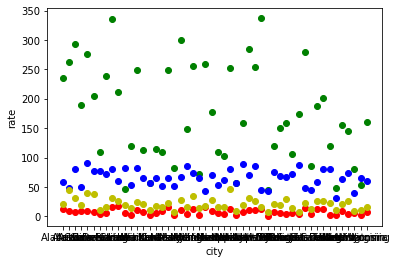

In [14]:
plt.scatter(crime.City, crime.Murder, color='r')
plt.scatter(crime.City, crime.Assault, color='g')
plt.scatter(crime.City, crime.UrbanPop, color='b')
plt.scatter(crime.City, crime.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [16]:
X=crime[['Murder','Assault','UrbanPop','Rape']]

In [19]:
crime_norm=preprocessing.scale(X)

In [20]:
crime_norm=pd.DataFrame(crime_norm)

In [21]:
crime_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [34]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_norm)

In [36]:
y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [37]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [38]:
crime['cluster']=cluster

In [39]:
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,10.8,257.4,76.0,33.2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

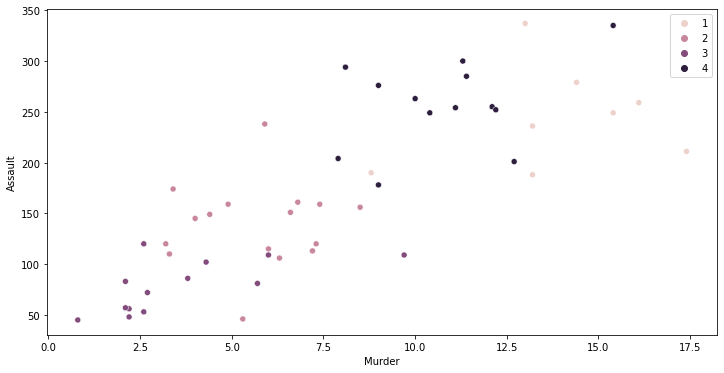

In [42]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

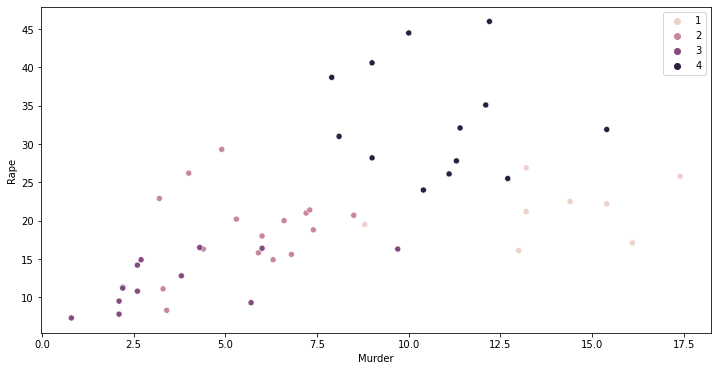

In [45]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=crime['Murder'], y = crime['Rape'],hue=y_kmeans1)

<AxesSubplot:xlabel='Assault', ylabel='Rape'>

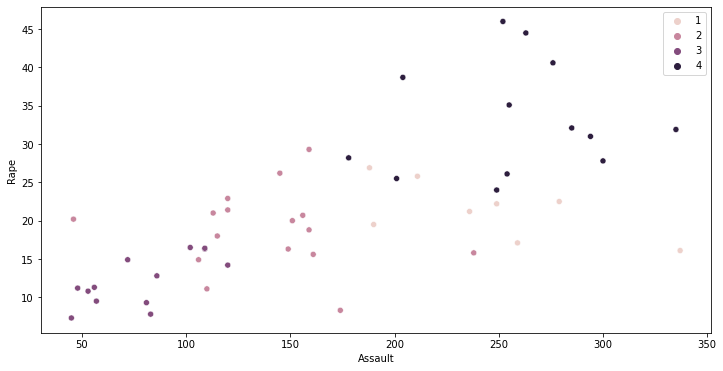

In [46]:
plt.figure(figsize=(12,6))
sn.scatterplot(x=crime['Assault'], y = crime['Rape'],hue=y_kmeans1)

In [51]:
stats = crime.sort_values("Total", ascending=True)
df1_total= pd.DataFrame(stats)

In [52]:
df1_total.head()

,City,Murder,Assault,UrbanPop,Rape,cluster,Total
44,Vermont,2.2,48,32,11.2,3,96.4
33,North Dakota,0.8,45,44,7.3,3,100.1
28,New Hampshire,2.1,57,56,9.5,3,127.6
14,Iowa,2.2,56,57,11.3,3,129.5
48,Wisconsin,2.6,53,66,10.8,3,135.4


# Conclusion
1 Higher the murder rates in a city higer the assaults and vice versa

2 Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 murder and assault, also rates of rape and assault show clearer correlations